In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

In [3]:
df = pd.read_csv("recall_per_sample.tsv", sep="\t")
df

,GT,step_GT,recall,nb_of_truth_probes_found,nb_of_truth_probes_in_total,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,sample
0,0,0,0.919532,156349.0,170031.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,CFT073
1,0,0,0.891860,149787.0,167949.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,H131800734
2,0,0,0.910366,152895.0,167949.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,H131800734
3,0,0,0.885225,160147.0,180911.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,ST38
4,0,0,0.922573,156866.0,170031.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,CFT073
5,0,0,0.872948,146210.0,167490.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,063_STEC
6,0,0,0.980886,166781.0,170031.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,CFT073
7,0,0,0.879698,159147.0,180911.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,ST38
8,0,0,0.890596,149166.0,167490.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,063_STEC
9,0,0,0.947877,158760.0,167490.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,063_STEC


In [22]:
# sample_order = ["CFT073", "063_STEC", "H131800734", "ST38"]
sample_order = ["CFT073", "H131800734", "063_STEC", "ST38"]
ordered_df = df
ordered_df["order"] = ordered_df["sample"].apply(
    lambda sample: sample_order.index(sample)
)
ordered_df.sort_values(by="order", inplace=True)
ordered_df

,GT,step_GT,recall,nb_of_truth_probes_found,nb_of_truth_probes_in_total,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,sample,order
0,0,0,0.919532,156349.0,170031.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,CFT073,0
4,0,0,0.922573,156866.0,170031.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,CFT073,0
6,0,0,0.980886,166781.0,170031.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,CFT073,0
1,0,0,0.891860,149787.0,167949.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,H131800734,1
2,0,0,0.910366,152895.0,167949.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,H131800734,1
11,0,0,0.915129,153695.0,167949.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,H131800734,1
5,0,0,0.872948,146210.0,167490.0,pandora_illumina_no_denovo,100x,0,0.0,1.0,063_STEC,2
8,0,0,0.890596,149166.0,167490.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,063_STEC,2
9,0,0,0.947877,158760.0,167490.0,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,063_STEC,2
3,0,0,0.885225,160147.0,180911.0,pandora_illumina_with_denovo,100x,0,0.0,1.0,ST38,3


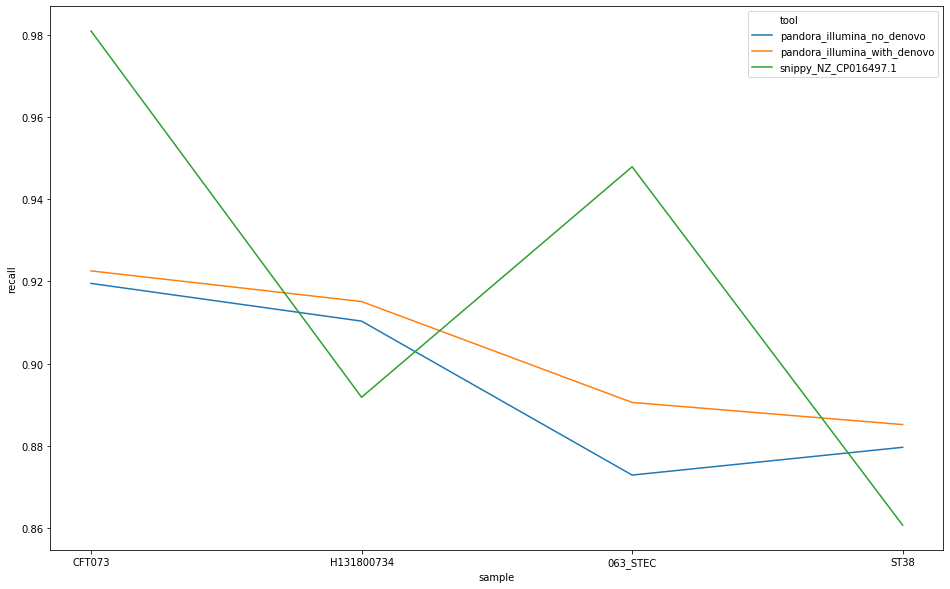

In [23]:
sns.lineplot(x="sample", y="recall",
             hue="tool", data=ordered_df, sort=False)